In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 14.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Install pmdarima
!pip install pmdarima

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

/Users/kirtisailinaidu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df = pd.read_csv('/Users/kirtisailinaidu/Downloads/Timeseries/exchange_rate.csv')
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
df.shape

(7588, 2)

In [6]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [9]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [12]:
import pandas as pd

# Example: load your DataFrame (replace this with your actual data loading code)
# df = pd.read_csv('your_file.csv')

# Step 1: Print the columns of the DataFrame
print("Columns in DataFrame:", df.columns)

# Step 2: Check if 'Date' column exists and correct the column name if necessary
# Assuming 'Date' column exists with correct capitalization
if 'Date' in df.columns:
    # Step 3: Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
else:
    print("Error: 'Date' column not found in DataFrame")

Columns in DataFrame: Index(['date', 'Ex_rate'], dtype='object')
Error: 'Date' column not found in DataFrame


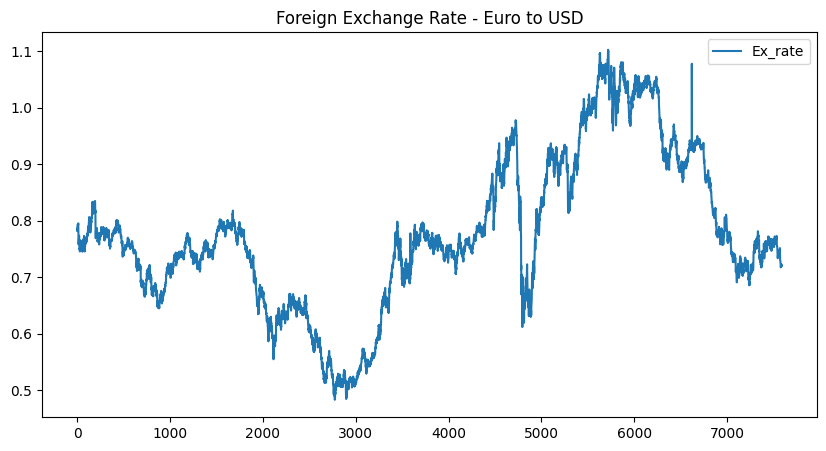

In [14]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate - Euro to USD')
plt.savefig('Foreign Exchange Rate - Euro to USD.png')
plt.show()

In [25]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  250


,Ex_rate
date,
1990-01-31,0.773874
1990-02-28,0.757486
1990-03-31,0.760365
1990-04-30,0.770110
1990-05-31,0.789684


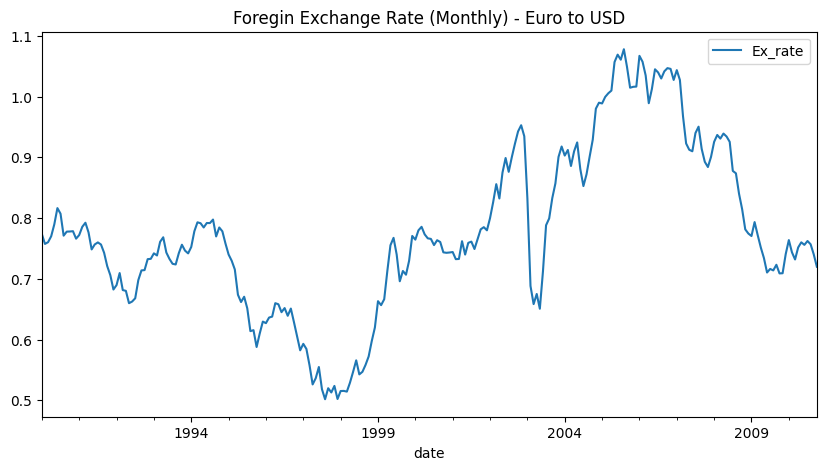

In [26]:
df_month.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Monthly) - Euro to USD')
plt.savefig('Foregin Exchange Rate (Monthly) - Euro to USD')
plt.show()

In [27]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  21


,Ex_rate
date,
1990-12-31,0.778996
1991-12-31,0.749830
1992-12-31,0.695201
1993-12-31,0.743442
1994-12-31,0.781024


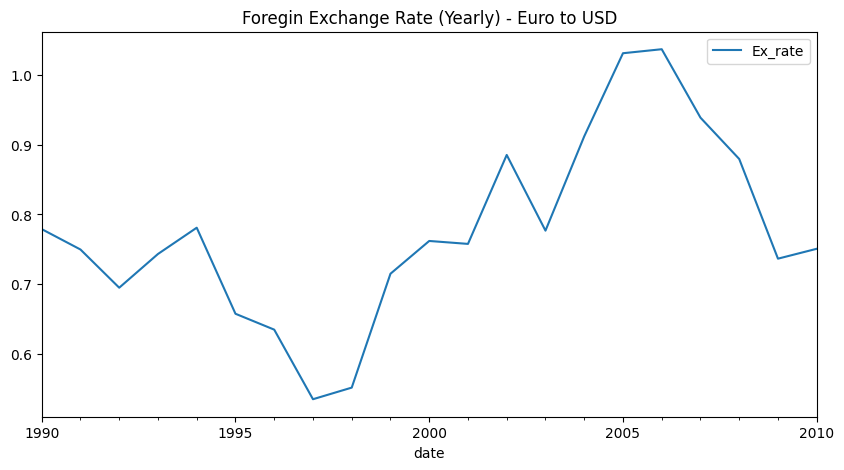

In [28]:
df_year.plot(figsize = (10,5))
plt.title('Foregin Exchange Rate (Yearly) - Euro to USD')
plt.savefig('Foregin Exchange Rate (Yearly) - Euro to USD.png')
plt.show()

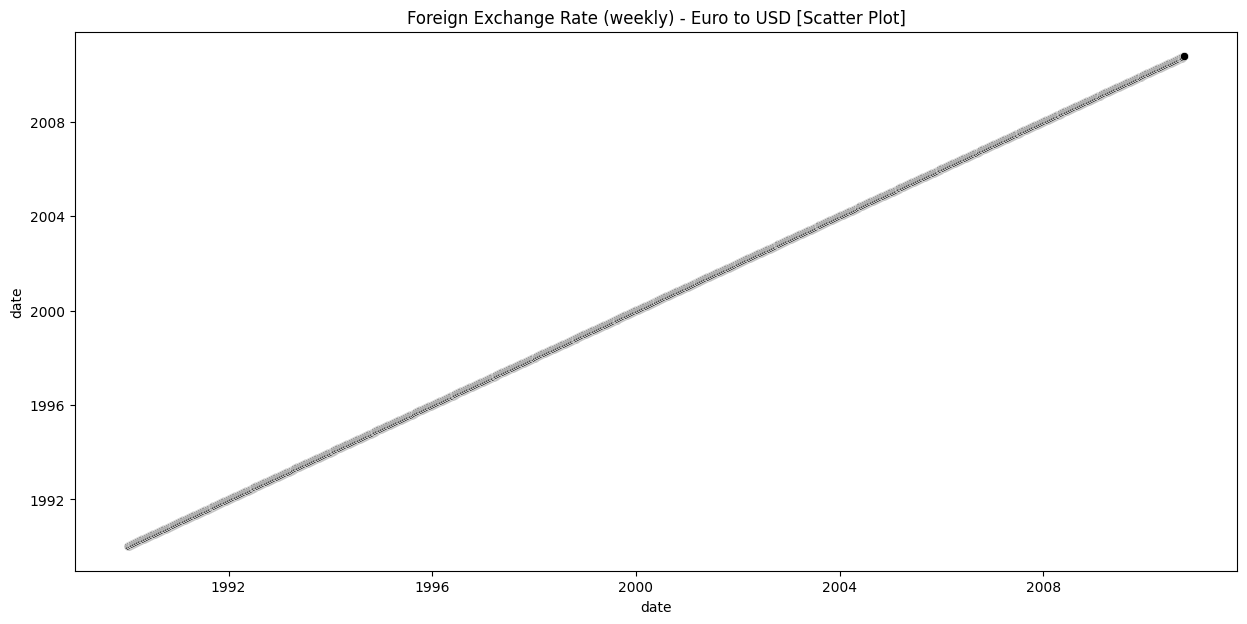

In [42]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x=df_week.index, y=df_week.index, color='black')
plt.title('Foreign Exchange Rate (weekly) - Euro to USD [Scatter Plot]')
plt.savefig('Foreign Exchange Rate (weekly) - Euro to USD [Scatter Plot].png')
plt.show()

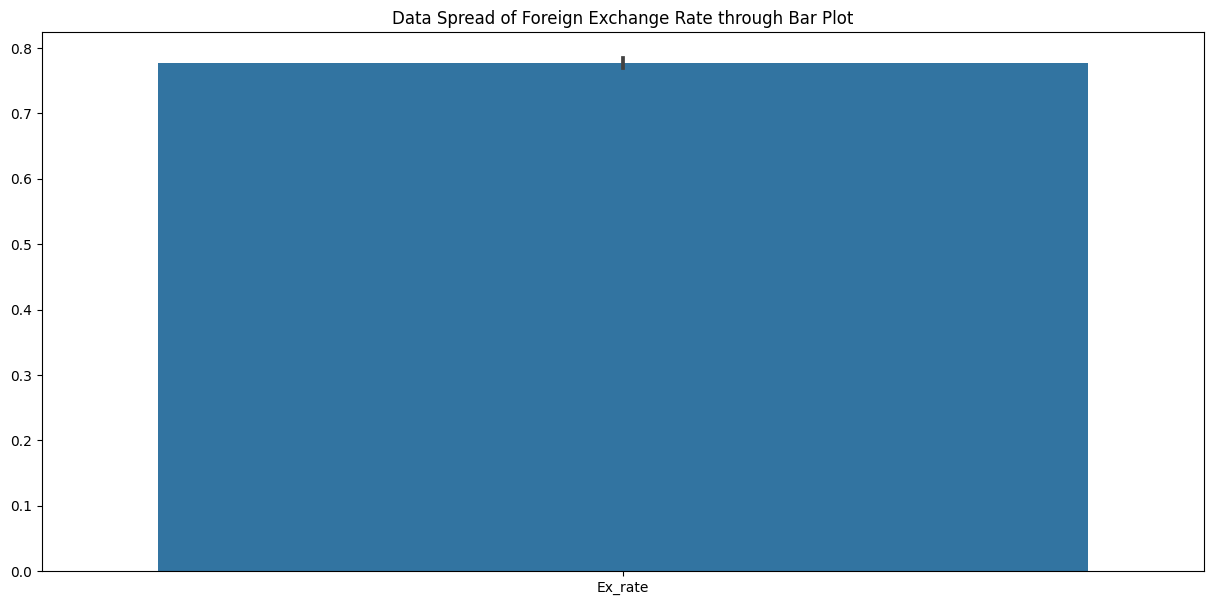

In [59]:
sns.barplot(data = df_week)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
plt.savefig('Data Spread of Foreign Exchange Rate through Bar Plot.png')
plt.show()

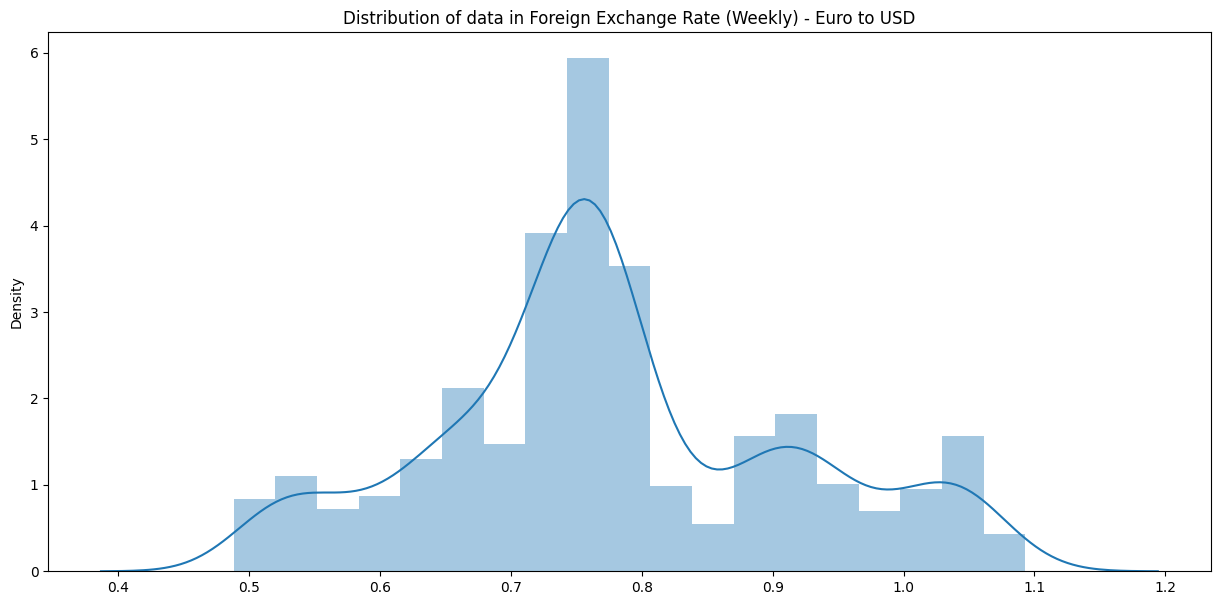

In [60]:
sns.distplot(df_week)
plt.title('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD')
plt.savefig('Distribution of data in Foreign Exchange Rate (Weekly) - Euro to USD.png')
plt.show()

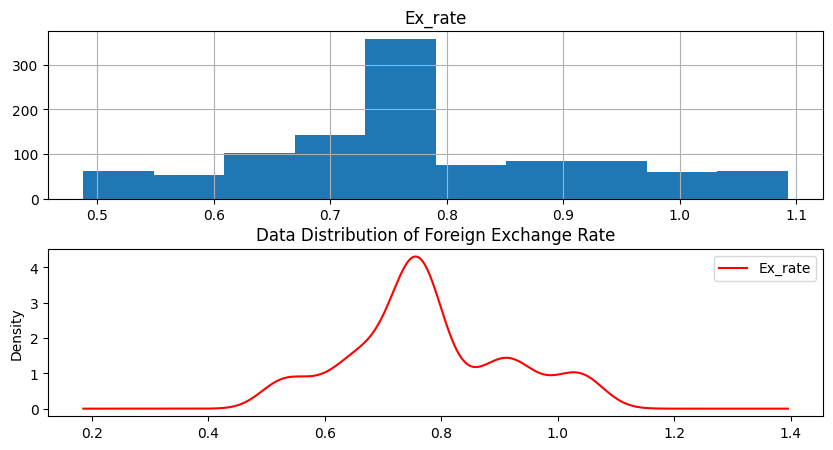

In [61]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde' , ax = ax2,c = 'r')
plt.title('Data Distribution of Foreign Exchange Rate')
plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

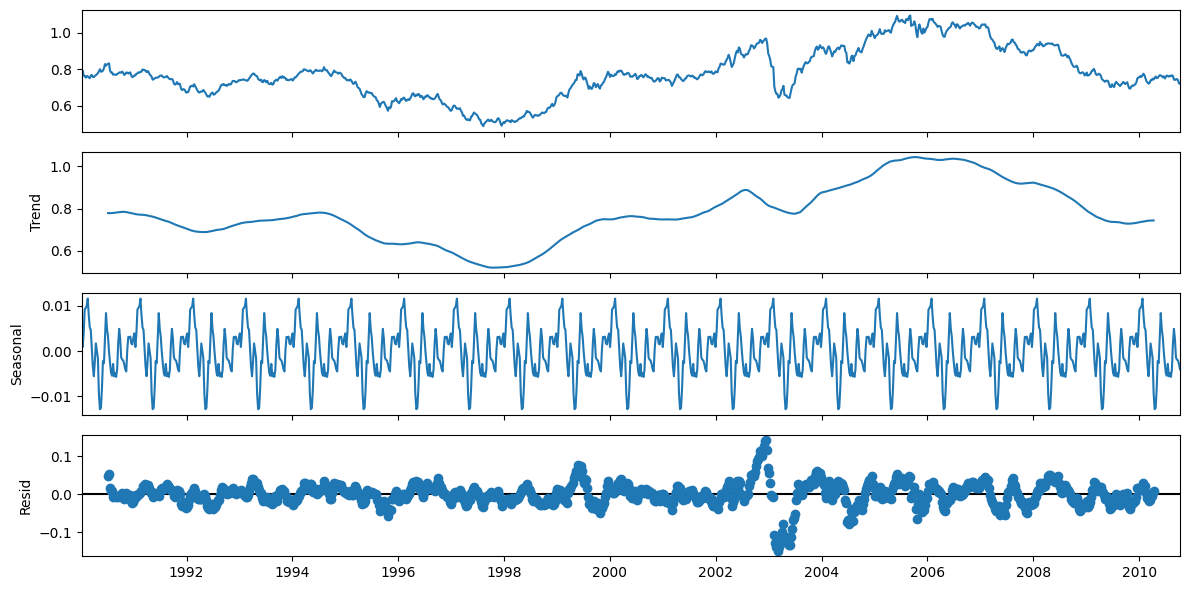

In [62]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_week , period = 52 , model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

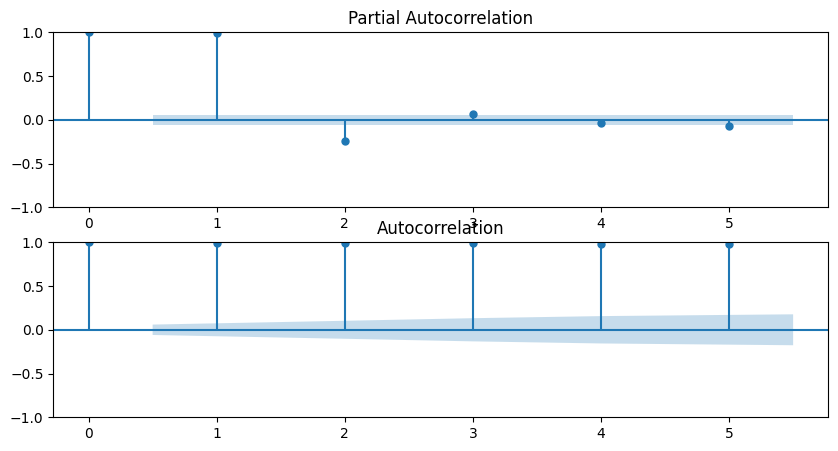

In [63]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = plot_pacf(df_week , lags = 5 , ax = ax1)
ax2 = plot_acf(df_week , lags = 5 , ax = ax2)
plt.savefig('Partial Autocorrelation and Autocorrelation.png')
plt.show()

In [64]:
def adf_check(time_series):
    result = adfuller(time_series , autolag = 'AIC')
    label = pd.Series(result[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in result[4].items():
        label['Critical Value (%s)'%key] = value
    print(label)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

In [65]:
adf_check(df_week)

Test Statistic                   -1.800054
p-value                           0.380435
Number of Lags Used               4.000000
Number of Observations Used    1079.000000
Critical Value (1%)              -3.436425
Critical Value (5%)              -2.864222
Critical Value (10%)             -2.568198
dtype: float64
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [66]:
df1_week = df_week.diff().dropna()
print('Count of weekly First Difference',df1_week.shape[0])
df1_week.head()

Count of weekly First Difference 1083


,Ex_rate
date,
1990-01-14,0.006986
1990-01-21,-0.027843
1990-01-28,-0.002443
1990-02-04,-0.008900
1990-02-11,0.009114


In [67]:
adf_check(df1_week)

Test Statistic                -1.434209e+01
p-value                        1.055846e-26
Number of Lags Used            3.000000e+00
Number of Observations Used    1.079000e+03
Critical Value (1%)           -3.436425e+00
Critical Value (5%)           -2.864222e+00
Critical Value (10%)          -2.568198e+00
dtype: float64
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary


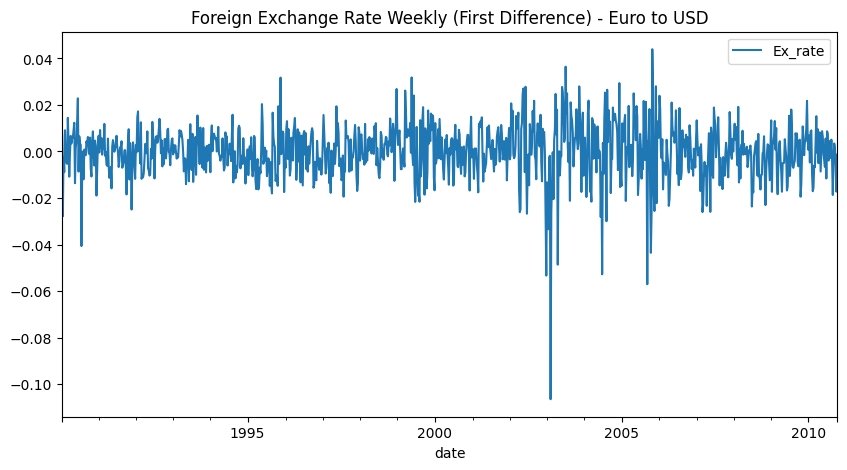

In [68]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchange Rate Weekly (First Difference) - Euro to USD')
plt.savefig('Foreign Exchange Rate Weekly(First Difference) - Euro to USD.png')
plt.show()

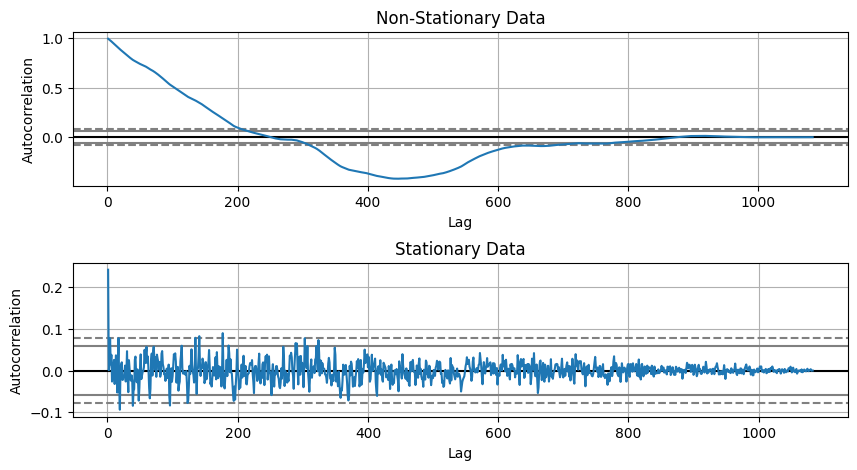

In [69]:
fig , (ax1,ax2) = plt.subplots(nrows = 2 ,ncols = 1,sharex = False , sharey = False , figsize = (10,5))
ax1 = autocorrelation_plot(df_week , ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week , ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Stationary data and Non-Stationary data.png')
plt.show()

In [70]:
model = auto_arima(df_week , m = 52, d = 1 ,seasonal = False , max_order = 8 , test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6685.063, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6624.331, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6687.232, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6691.370, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6626.300, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6689.294, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6689.240, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6687.279, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-6693.352, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6691.277, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-6691.222, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6689.215, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-6689.262, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.844 seconds


In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1084
Model:               SARIMAX(0, 1, 1)   Log Likelihood                3348.676
Date:                Fri, 24 May 2024   AIC                          -6693.352
Time:                        11:18:01   BIC                          -6683.377
Sample:                    01-07-1990   HQIC                         -6689.575
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2606      0.026      9.968      0.000       0.209       0.312
sigma2         0.0001   2.14e-06     56.284      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4493.99
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
model = ARIMA(df_week , order = (0,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 1084
Model:                 ARIMA(0, 1, 1)   Log Likelihood                3348.676
Date:                Fri, 24 May 2024   AIC                          -6693.352
Time:                        11:18:11   BIC                          -6683.377
Sample:                    01-07-1990   HQIC                         -6689.575
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2606      0.026      9.968      0.000       0.209       0.312
sigma2         0.0001   2.14e-06     56.284      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4493.99
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

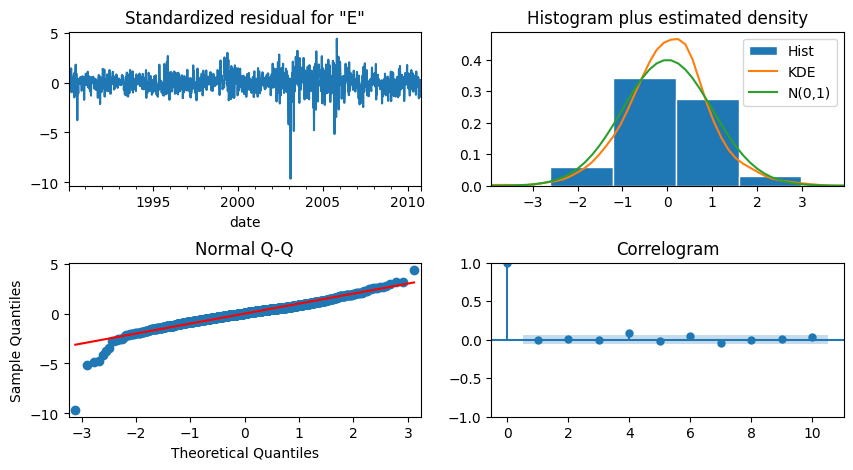

In [73]:
result.plot_diagnostics(figsize = (10,5))
plt.subplots_adjust(hspace = 0.5)
plt.savefig('Diagnostic plot of best model.png')
plt.show()

In [74]:
predictions = result.predict(typ = 'levels')

In [78]:
Final_data = pd.concat([df_week,df1_week,predictions],axis=1)
Final_data.columns = ['Foreign Exchange Rate (weekly)','Weekly First Difference','Predicted Exchange Rate']
Final_data.to_csv('Foreign Exchange Rate with Prediction (Euro To USD).csv')
Final_data.head()

,Foreign Exchange Rate (weekly),Weekly First Difference,Predicted Exchange Rate
date,,,
1990-01-07,0.785729,NaN,0.000000
1990-01-14,0.792714,0.006986,0.785729
1990-01-21,0.764871,-0.027843,0.794419
1990-01-28,0.762429,-0.002443,0.757203
1990-02-04,0.753529,-0.008900,0.763790


In [81]:
size = int(len(df_week) * 0.80)
train, test = df_week[0:size], df_week[size:len(df_week)]
print('Count of Train Data:', train.shape[0])
print('Count of Test Data:', test.shape[0])

Count of Train Data: 867
Count of Test Data: 217


NameError: name 'predictions_df' is not defined

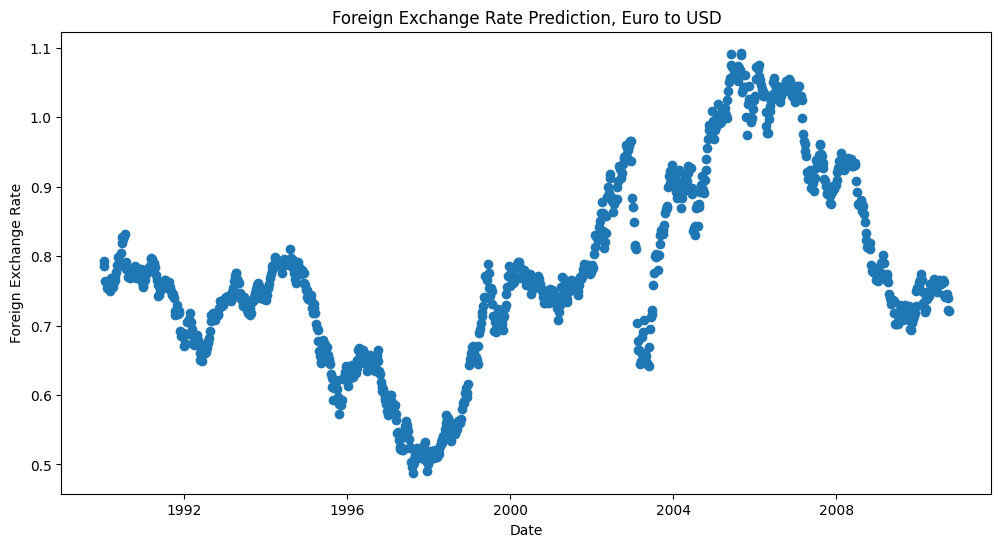

In [89]:
plt.rcParams['figure.figsize'] = (12,6)
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction, Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df, 'r', label='forecast')
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
plt.savefig('Foreign Exchange Rate Prediction - Euro to USD.png')